# Model Data Splitting and Prep

In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from data_processing import reLabelOne, reLabelTwo
from collections import Counter
from keras.utils.np_utils import to_categorical


In [11]:
datasetOneImages, datasetOneLabels = np.load('FYP/datasetOneNEW.npy', allow_pickle=True)
datasetTwoImages, datasetTwoLabels = np.load('FYP/datasetTwoNEW.npy', allow_pickle=True)

In [12]:
x_data = np.concatenate((datasetOneImages, datasetTwoImages))

In [13]:
x_data.shape

(13074,)

In [14]:
x_data
new_arr = []

In [15]:
shapes = []
for i in x_data:
    new_arr.append(i)
x_data = np.asarray(new_arr)

In [18]:
labelsOne = reLabelOne(datasetOneLabels)
labelsTwo = reLabelTwo(datasetTwoLabels)
y_data_int = np.concatenate((labelsOne, labelsTwo))
y_data_int.shape

(13074,)

In [19]:
Counter(y_data_int)

Counter({0: 3232, 1: 3270, 3: 3632, 2: 2940})

In [20]:
y_data = to_categorical(y_data_int)
y_data.shape

(13074, 4)

Shape of the training image array: 
 
(13074, 256, 256, 1)
 
 Some Examples: 



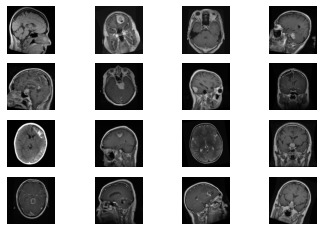

In [27]:
print("Shape of the training image array: \n \n" + str(x_data.shape) + "\n \n Some Examples: \n")

for i in range(0,16):
    x = random.randint(0,len(x_data))
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(x_data[x].astype(np.float32), cmap='gray')
    plt.axis("off")

In [28]:
x_data, y_data = shuffle(x_data, y_data)

In [29]:
x_data.max()

11890.24

In [30]:
training_split = round(len(x_data) * 0.9)

x_data /= 255

training_x = x_data[:training_split]
testing_x = x_data[training_split:]

training_y = y_data[:training_split]
testing_y = y_data[training_split:]

print(f'Training Images: {len(training_x)} \nTraining Labels: {len(training_y)} \nTesting Images: {len(testing_x)} \nTesting Labels: {len(testing_y)}')

Training Images: 11767 
Training Labels: 11767 
Testing Images: 1307 
Testing Labels: 1307


In [31]:
# np.save('FYP/training_x.npy', training_x)
# np.save('FYP/training_y.npy', training_y)

# np.save('FYP/testing_x.npy', testing_x)
# np.save('FYP/testing_y.npy', testing_y)

In [32]:
# training_x = np.load('FYP/training_x.npy', allow_pickle=True)
# training_y = np.load('FYP/training_y.npy', allow_pickle=True)
# testing_x = np.load('FYP/testing_x.npy', allow_pickle=True)
# testing_y = np.load('FYP/testing_y.npy', allow_pickle=True)

In [33]:
test_labels_dist = np.argmax(testing_y, axis=1)
training_labels_dist = np.argmax(training_y, axis=1)

In [34]:
print(f'{Counter(test_labels_dist)} --- {Counter(training_labels_dist)}')

Counter({3: 367, 0: 328, 1: 307, 2: 305}) --- Counter({3: 3265, 1: 2963, 0: 2904, 2: 2635})
